In [1]:
import pandas as pd

### Load Dataset

In [2]:
train=pd.read_csv("train.csv", index_col = 'PassengerId')

In [3]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
test = pd.read_csv("test.csv", index_col = 'PassengerId')

In [5]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


## Explore

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='Embarked', ylabel='count'>

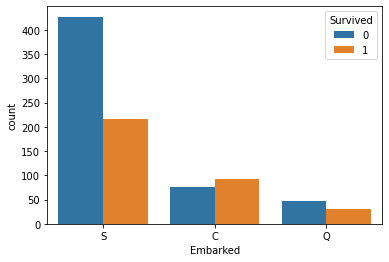

In [7]:
sns.countplot(data=train, x = 'Embarked', hue = 'Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

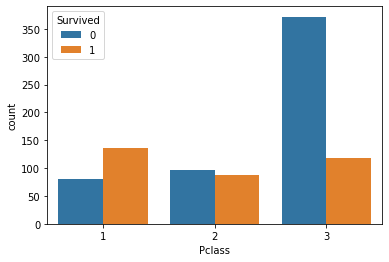

In [8]:
sns.countplot(data=train, x='Pclass', hue = 'Survived')

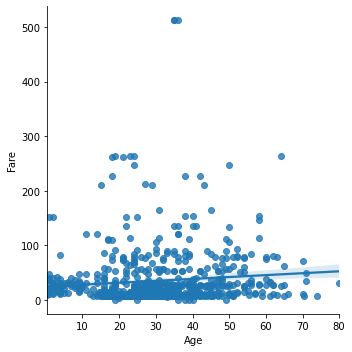

In [9]:
sns.lmplot(data=train, x='Age', y='Fare')  ## such as scatter plot???

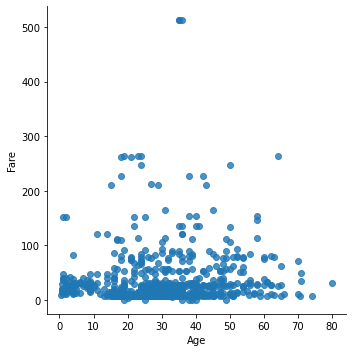

In [10]:
sns.lmplot(data=train, x='Age', y='Fare',fit_reg=False) 

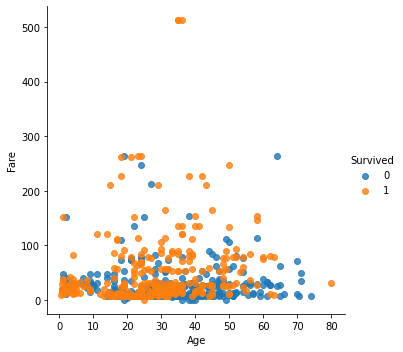

In [11]:
sns.lmplot(data=train, x='Age', y='Fare',hue = 'Survived',fit_reg=False) 

In [12]:
low_fare = train[train['Fare']<100]  # Delete outlire

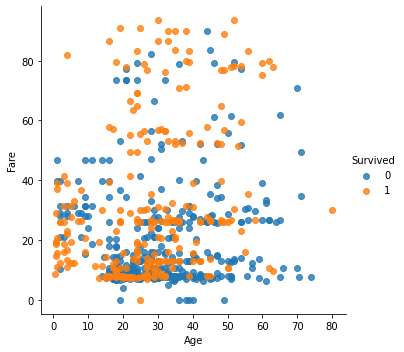

In [13]:
sns.lmplot(data=low_fare, x='Age', y='Fare',hue = 'Survived',fit_reg=False) 

## Preprocessing

### Encode Sex

In [14]:
train['Sex_encode'] = train['Sex'].replace('male',0).replace('female',1)
train[['Sex','Sex_encode']].head()

,Sex,Sex_encode
PassengerId,,
1,male,0
2,female,1
3,female,1
4,female,1
5,male,0


In [15]:
test['Sex_encode'] = test['Sex'].replace('male',0).replace('female',1)
test[['Sex','Sex_encode']].head()

,Sex,Sex_encode
PassengerId,,
892,male,0
893,female,1
894,male,0
895,male,0
896,female,1


### Fill in missing Fare

In [16]:
# Non, null
train[train['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,


In [17]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [18]:
test['Fare'] = test['Fare'].fillna(0)

# Non, null

test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,


### Train

In [19]:
# Freture(X) - Pclass, Sex, Fare, ...
# Label(Y) - Survivedfeature_names = ['Pclass']
feature_names = ['Pclass','Sex_encode','Fare']
feature_names

['Pclass', 'Sex_encode', 'Fare']

In [20]:
X = train[feature_names]
X.head()

,Pclass,Sex_encode,Fare
PassengerId,,,
1,3,0,7.2500
2,1,1,71.2833
3,3,1,7.9250
4,1,1,53.1000
5,3,0,8.0500


In [21]:
label_name = 'Survived'
Y = train[label_name]
Y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

### Use Decision Tree

In [22]:
# scikit-learn == sklearn
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)
model

DecisionTreeClassifier(max_depth=5)

In [23]:
# 1) fit(train) -> 2) predict(test)

model.fit(X,Y)

DecisionTreeClassifier(max_depth=5)

### Visualize

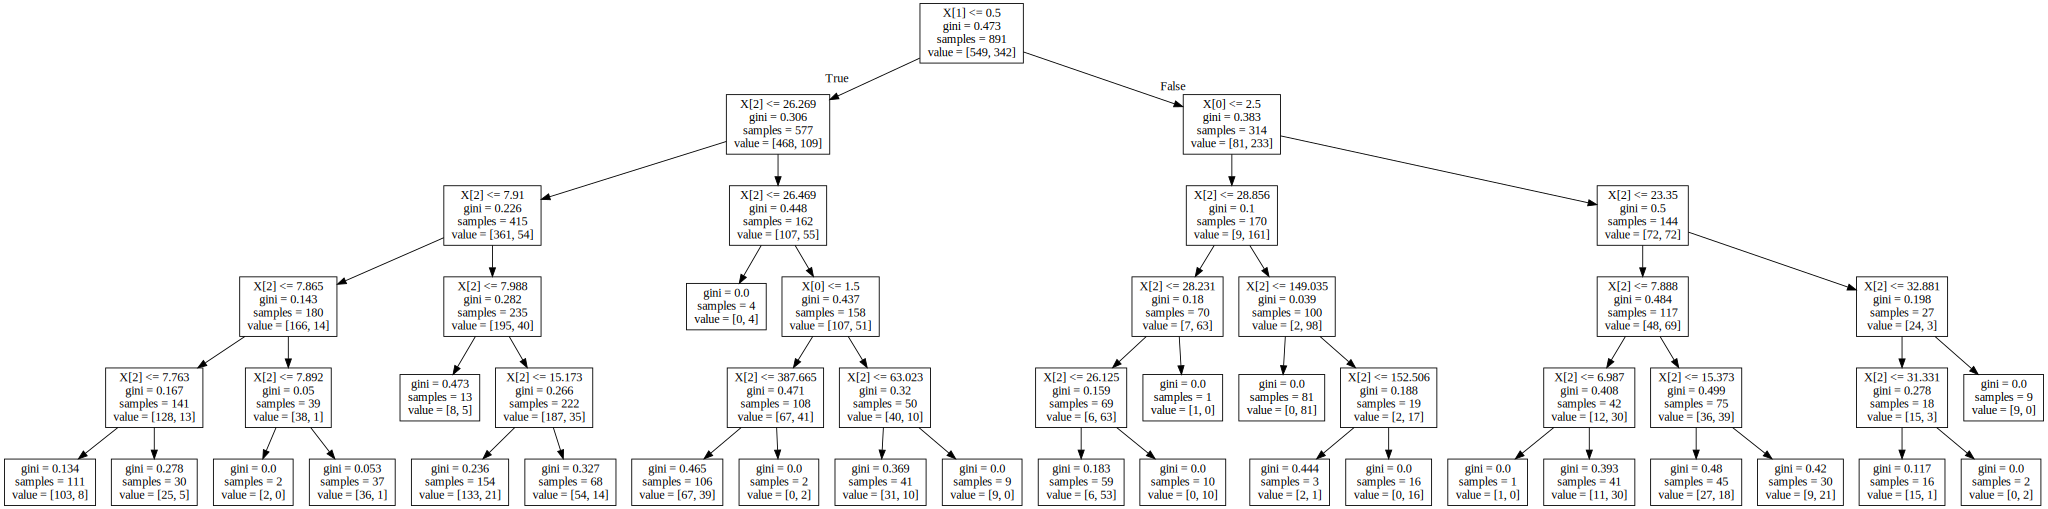

In [24]:
#import os
#os.environ['PATH']+=os.pathsep+'C:/Program Files/Graphviz 2.44.1/bin/'
import graphviz
from sklearn.tree import export_graphviz

tree = export_graphviz(model)

graphviz.Source(tree)

## Predict

In [25]:
# test
X_test = test[feature_names]

X_test.head()

,Pclass,Sex_encode,Fare
PassengerId,,,
892,3,0,7.8292
893,3,1,7.0000
894,2,0,9.6875
895,3,0,8.6625
896,3,1,12.2875


In [26]:
model

DecisionTreeClassifier(max_depth=5)

In [27]:
prediction_list = model.predict(X_test)
prediction_list[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

## Submit

In [28]:
submit = pd.read_csv('gender_submission.csv')

submit['Survived'] = prediction_list

submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [29]:
submit.to_csv('decisioin-tree.csv', index = False)